In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
speed_usb_31 = 10*1e9 # bits per second

In [3]:
matmul_data = {}
flops = {}
input_sizes = [1,2,4,8,16,32,64,128,256,512,1024]
output_sizes = [1,2,4,8,16,32,64,128,256,512,1024]
flops_mean = []

for i in input_sizes:
    for j in output_sizes:
        matmul_data[ "matmul_" + str(i) + "_" + str(j) ] = pd.read_csv("output_files/matmul_" + str(i) + "_" + str(j) + "/matmul_" + str(i) + "_" + str(j) + ".csv")
        flops[ "matmul_" + str(i) + "_" + str(j) ] = ( matmul_data[ "matmul_" + str(i) + "_" + str(j) ]['flops_tpu_mean'][0], matmul_data[ "matmul_" + str(i) + "_" + str(j) ]['flops_tpu_stdev'][0])
    flops_mean.append([flops[ "matmul_" + str(i) + "_" + str(j) ][0] for j in [1,2,4,8,16,32,64,128,256,512,1024] ])
    
flops_mean = np.array(flops_mean)

In [4]:
# Subtract the processing times with the time for data input and output transport

pure_processing_time = np.array([[matmul_data["matmul_" + str(i) + "_" + str(j)]['latency_tpu_mean'][0] - (i*8+j*8)/speed_usb_31 for j in output_sizes] for i in input_sizes])

pure_processing_time

array([[0.00035636, 0.00033529, 0.00034059, 0.00038262, 0.00037791,
        0.00036887, 0.00034393, 0.00033682, 0.00034872, 0.00038398,
        0.00038282],
       [0.00035906, 0.00033567, 0.00033871, 0.00035138, 0.00038268,
        0.00037729, 0.00035729, 0.0003364 , 0.00034333, 0.00036974,
        0.00038864],
       [0.00037328, 0.00035124, 0.00033843, 0.00034485, 0.0003684 ,
        0.00038109, 0.0003733 , 0.00034491, 0.00034315, 0.00034389,
        0.00038093],
       [0.00037986, 0.00037348, 0.00034972, 0.00033896, 0.00034346,
        0.00038536, 0.00038141, 0.00037697, 0.00033418, 0.00034353,
        0.00037194],
       [0.00038431, 0.00038114, 0.00035056, 0.00033345, 0.00034009,
        0.00037765, 0.00038579, 0.00037225, 0.00035091, 0.00034326,
        0.00034886],
       [0.00037793, 0.00038375, 0.00037341, 0.00034149, 0.00033809,
        0.00034004, 0.00038101, 0.00038053, 0.00037687, 0.00033982,
        0.00034632],
       [0.00035621, 0.00033683, 0.00034241, 0.00038288, 0.

In [5]:
pure_flops = np.array([[ ((2**i)*8*(2**j)*8)/pure_processing_time[i,j] for j in range(11)] for i in range(11)])

pure_flops

array([[1.79595763e+05, 3.81762895e+05, 7.51646971e+05, 1.33812527e+06,
        2.70966656e+06, 5.55207120e+06, 1.19095425e+07, 2.43212660e+07,
        4.69828711e+07, 8.53387287e+07, 1.71194663e+08],
       [3.56484045e+05, 7.62653399e+05, 1.51160305e+06, 2.91421698e+06,
        5.35172335e+06, 1.08564611e+07, 2.29279165e+07, 4.87037487e+07,
        9.54422724e+07, 1.77248496e+08, 3.37257765e+08],
       [6.85816808e+05, 1.45770365e+06, 3.02571700e+06, 5.93874836e+06,
        1.11183532e+07, 2.14959605e+07, 4.38900502e+07, 9.50032837e+07,
        1.90984594e+08, 3.81148870e+08, 6.88176781e+08],
       [1.34788081e+06, 2.74175695e+06, 5.85617059e+06, 1.20839001e+07,
        2.38510882e+07, 4.25160001e+07, 8.59127602e+07, 1.73848304e+08,
        3.92216526e+08, 7.63090393e+08, 1.40961202e+09],
       [2.66450979e+06, 5.37337905e+06, 1.16840692e+07, 2.45673570e+07,
        4.81757576e+07, 8.67679578e+07, 1.69876825e+08, 3.52110266e+08,
        7.47035454e+08, 1.52739667e+09, 3.00573816e+

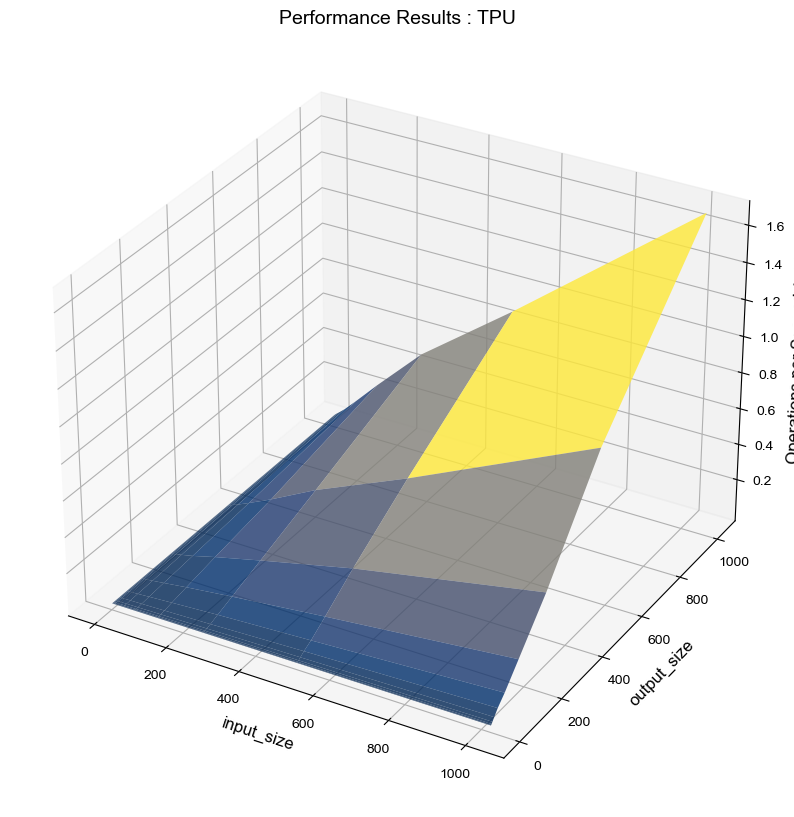

In [28]:
# Convert input_sizes and output_sizes to 2D arrays
input_sizes_mesh, output_sizes_mesh = np.meshgrid(input_sizes, output_sizes)

plt.rcParams.update({'font.sans-serif':'Arial'})

fig = plt.figure(figsize=(10, 15))
ax = plt.axes(projection='3d')
 
# ax.plot_surface(input_sizes_mesh, output_sizes_mesh, flops_mean, cmap='cool', alpha=0.8)
ax.plot_surface(input_sizes_mesh, output_sizes_mesh, pure_flops, cmap='cividis', alpha=0.8)

ax.set_title('Performance Results : TPU', fontsize=14)
ax.set_xlabel('input_size', fontsize=12)
ax.set_ylabel('output_size', fontsize=12)
ax.set_zlabel('Operations per Second (e11)', fontsize=12)
# ax.colorbar()

fig.savefig("tpu_results.png")
fig.savefig("tpu_results.pdf")

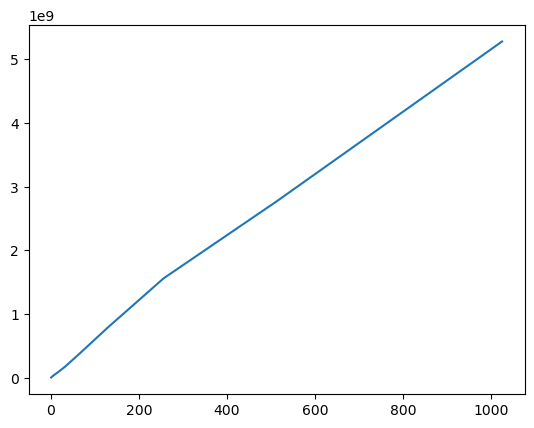

In [20]:
plt.figure()

plt.plot([1,2,4,8,16,32,64,128,256,512,1024], [flops[ "matmul_" + str(1024) + "_" + str(j) ][0] for j in [1,2,4,8,16,32,64,128,256,512,1024]])



plt.show()